# MEGALINE Project

The purpose of this project is to conduct a preliminary analysis of the prepaid rates offered by Megaline. The company provides its customers with two prepaid plans, Surf and Ultimate. The commercial department wants to know which of these plans generates more revenue to better allocate the advertising budget.

To achieve this, we have data from 500 Megaline customers, which includes information about who the customers are, where they are from, which plan they use, as well as the number of calls they made and text messages they sent in 2018. The ultimate goal is to analyze customer behavior and determine which prepaid plan generates more revenue.

Throughout the project, we have carried out the following actions:

* <b>Data Acquisition:</b> We started by collecting data from 500 Megaline customers, which provided us with detailed information about their telecommunications service usage behavior.

* <b>Data Cleaning and Preparation:</b> We performed data cleaning and preparation tasks to ensure that the data was free of errors, duplicates, or missing values. We also combined relevant data on customers, plans, and service usage into a single dataset for more efficient analysis.

* <b>Exploratory Data Analysis:</b> We conducted an exploratory data analysis to better understand the characteristics of the customers and their service usage behavior. This included calculating descriptive statistics, visualizing distributions, and exploring relationships between variables.

* <b>Revenue Analysis by Plan:</b> We used the data to calculate the revenue generated by each prepaid plan (Surf and Ultimate). This involved calculating the monthly revenue for each customer and then analyzing the average revenue per plan.

* <b>Hypothesis Testing:</b> We performed hypothesis tests to determine if there are significant differences in the average revenue between the Surf and Ultimate plans, as well as between users in the NY-NJ-PA area and those in other regions.

In the end, the main objective is to provide Megaline with relevant, data-driven information to aid in decision-making regarding marketing strategies, price adjustments, and resource allocation, with the aim of maximizing revenue and improving customer satisfaction.

We start by importing our libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Prep

I proceed to store the paths of each dataframe in recognizable variables, which I will use subsequently:

- `mlusers_df`
- `mlcalls_df`
- `mlsms_df`
- `mlinternet_df`
- `mlplans_df`

In [2]:
mlusers_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_users.csv')
mlcalls_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_calls.csv')
mlsms_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_messages.csv')
mlinternet_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_internet.csv')
mlplans_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_plans.csv')

### Fees

In [3]:
print("Megaline Plans:")
print()
print(mlplans_df.info())
print()
print(mlplans_df)

Megaline Plans:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20

In [4]:
# Column reorder
mlplans_df = mlplans_df.reindex(columns=['plan_name', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb'])
print(mlplans_df)

  plan_name  usd_monthly_pay  minutes_included  messages_included  \
0      surf               20               500                 50   
1  ultimate               70              3000               1000   

   mb_per_month_included  usd_per_minute  usd_per_message  usd_per_gb  
0                  15360            0.03             0.03          10  
1                  30720            0.01             0.01           7  


### Users

In [5]:
print("Megaline Users:")
print()
print(mlusers_df.info())
print('-' * 50)
print("Null values:")
print()
print(mlusers_df.isnull().sum())
print('-' * 50)
print("Duplicates:", mlusers_df.duplicated().sum())

Megaline Users:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
--------------------------------------------------
Null values:

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
--------------------------------------------------
Duplicates: 0


In [6]:
print('Users')
print()
print(mlusers_df.sample(5))

Users

     user_id first_name last_name  age  \
455     1455       Jude   Fischer   20   
276     1276     Karmen    Carney   20   
245     1245      Quinn     David   30   
64      1064    Gerardo    Ashley   46   
213     1213       Carl    Newman   47   

                                          city    reg_date      plan  \
455             Denver-Aurora-Lakewood, CO MSA  2018-08-13      surf   
276              Phoenix-Mesa-Chandler, AZ MSA  2018-02-14      surf   
245  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-19      surf   
64   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-03      surf   
213     San Diego-Chula Vista-Carlsbad, CA MSA  2018-11-25  ultimate   

    churn_date  
455        NaN  
276        NaN  
245        NaN  
64         NaN  
213        NaN  


I observe that there are no null values in the columns user_id, first_name, last_name, age, city, and reg_date.

However, there are 466 null values in the churn_date column, indicating that 34 users have canceled their subscription.

To improve data quality, I considered the following:

* Converting the reg_date and churn_date columns to the datetime data type to facilitate manipulation and analysis.

* Separating the status information into a new column.

Regarding the null values, I have decided to leave them as they are, since I believe they will not affect subsequent analysis.

In general, the information seems to be in good condition for analysis; however, the adjustments mentioned could improve data quality and facilitate further processing.

I proceed to convert the reg_date and churn_date columns to the datetime data type. I will ensure that any subsequent dataframes containing dates will use this format. It is not necessary to verify this with a print statement, considering that we will have samples of the dataframe later on.

In [7]:
mlusers_df['reg_date'] = pd.to_datetime(mlusers_df['reg_date'], format='%Y-%m-%d')
mlusers_df['churn_date'] = pd.to_datetime(mlusers_df['churn_date'], format='%Y-%m-%d')

In the city column, I observe that all records end with the abbreviation "MSA" (Metropolitan Statistical Area). I opted to remove this abbreviation by replacing it with an empty string, as it is redundant and adds unnecessary "noise" to the users' dataframe.

In [8]:
mlusers_df['city'] = mlusers_df['city'].str.replace(' MSA', '')

# Let's verify
print(mlusers_df['city'].head(5))

0    Atlanta-Sandy Springs-Roswell, GA
1          Seattle-Tacoma-Bellevue, WA
2     Las Vegas-Henderson-Paradise, NV
3                            Tulsa, OK
4          Seattle-Tacoma-Bellevue, WA
Name: city, dtype: object


<b>Creation of the 'state' Column and Extraction of US State Information</b>  

We proceed to extract the state from the 'city' column. We used Pandas' str.extract() function to search for patterns in the text field.

The pattern used, r',\s*([A-Z]{2,}(?:-[A-Z]{2,})*)$, searches for matches of two or more uppercase letters followed by an optional dash and more uppercase letters at the end of the string. This corresponds to the state abbreviation in the 'city' column.

The result of this extraction is assigned to a new column called 'state'.

In the code, we also aimed to remove the US state abbreviation from the 'city' column. We used a pattern similar to the one used before, but with a slight variation (r',\s*[A-Z]{2,}(?:-[A-Z]{2,})*$', '', regex=True). However, this time we used the str.replace() method to replace it with an empty string.

Subsequently, we reordered the fields in the dataframe.

In summary, I performed these transformations to separate the state from the city into two distinct columns ('city' and 'state') and reorganize the dataframe for a more coherent and understandable structure.


In [9]:
mlusers_df['state'] = mlusers_df['city'].str.extract(r',\s*([A-Z]{2,}(?:-[A-Z]{2,})*)$')
mlusers_df['city'] = mlusers_df['city'].str.replace(r',\s*[A-Z]{2,}(?:-[A-Z]{2,})*$', '', regex=True)
mlusers_df = mlusers_df.reindex(columns=['user_id', 'plan', 'first_name', 'last_name', 'age', 'city', 'state', 'reg_date', 'churn_date'])
print(mlusers_df[['city', 'state']].sample(5))

                               city        state
423  Philadelphia-Camden-Wilmington  PA-NJ-DE-MD
15                       Pittsburgh           PA
139            New Orleans-Metairie           LA
129                     Baton Rouge           LA
81      Dallas-Fort Worth-Arlington           TX


I'm going to add a new column 'user_status' to the dataframe mlusers_df. I might use it in the future (or maybe not, but it's worth having). Afterwards, I will proceed to reorder the data.

In [10]:
mlusers_df['user_status'] = np.where(mlusers_df['churn_date'].isnull(), 'active', 'inactive')

# Let's reorder
mlusers_df = mlusers_df.reindex(columns=['user_id', 'plan', 'user_status', 'first_name', 'last_name', 'age', 
                                        'city', 'state', 'reg_date', 'churn_date'])
print(mlusers_df.sample(10))

     user_id      plan user_status first_name  last_name  age  \
121     1121      surf      active  Kathaleen     Albert   34   
371     1371      surf      active   Roderick     Slater   27   
66      1066      surf      active      Ariel      Woods   61   
185     1185  ultimate      active      Loria    Freeman   47   
444     1444      surf      active     Glinda  Dickerson   70   
31      1031  ultimate      active       Lane     Martin   52   
334     1334      surf      active    Donovan     Horton   34   
145     1145      surf      active     Venice     Brooks   29   
347     1347  ultimate      active       Trey      Lynch   65   
207     1207      surf      active     Samuel     Porter   63   

                                      city     state   reg_date churn_date  
121  Miami-Fort Lauderdale-West Palm Beach        FL 2018-03-13        NaT  
371           Portland-Vancouver-Hillsboro     OR-WA 2018-10-27        NaT  
66                 Boston-Cambridge-Newton     MA-NH 

### Calls

In [11]:
print("Megaline Calls:")
print()
print(mlcalls_df.info())
print('-' * 45)
print("Null Values:")
print()
print(mlcalls_df.isnull().sum())
print('-' * 45)
print("Duplicates:", mlcalls_df.duplicated().sum())

Megaline Calls:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
---------------------------------------------
Null Values:

id           0
user_id      0
call_date    0
duration     0
dtype: int64
---------------------------------------------
Duplicates: 0


In [12]:
# Let's review
print('Calls')
print()
print(mlcalls_df.sample(5))
print('-' * 50)

Calls

               id  user_id   call_date  duration
92360     1332_16     1332  2018-12-30      1.88
24376    1092_173     1092  2018-12-20      6.46
101215   1361_317     1361  2018-10-03      3.59
89179   1324_1250     1324  2018-06-02     13.58
106629   1377_181     1377  2018-08-12      1.10
--------------------------------------------------


<b>Initial Observations of the Calls Dataframe</b>

* It seems that some call durations are 0.00, which could indicate missed or very short calls. It may be necessary to investigate and handle these calls with a duration of 0.00 to determine if they are valid data or indicative of some issue in call logging. However, due to the limitations of this project, we won't be able to do so.

* The "call_date" column should ideally be of datetime type instead of object to facilitate date handling and temporal operations.

* Call duration is stored as float64. Typically, for time values like this, it would be more appropriate to store them as timedelta or as integers representing seconds or minutes. However, in a previous iteration of this project, attempts to convert them resulted in errors during subsequent calculations in user behavior analysis. Therefore, it was decided to leave them as float64.

Overall, the DataFrame appears well-structured and clean, although the above suggestions would improve the quality and ease of data analysis.

First, I will change the values in 'call_date' to datetime data type.

In [13]:
mlcalls_df['call_date'] = pd.to_datetime(mlcalls_df['call_date'], format='%Y-%m-%d')

<b>Event Date and Event Type = Call</b>

Moving forward, we have decided to add more granularity to the data related to calls, messages, and internet usage.

* We will rename the date column to "event_date" to facilitate pivoting later on.

* Next, we will add another column called "event_type" to determine the type of service being used, and to group events accordingly. For this dataframe, the event type will be "call".

* Finally, we will add a column called 'rounded_duration'. Remember that Megaline rounds up individual calls, even if they only lasted for one second. For example, if a call lasted 61 seconds, it will be rounded up to two minutes.

In [14]:
mlcalls_df.rename(columns={'call_date': 'event_date'}, inplace=True)
mlcalls_df['event_type'] = 'call'
mlcalls_df['rounded_duration'] = np.ceil(mlcalls_df['duration'])

# Let's reorder
mlcalls_df = mlcalls_df[['id', 'user_id', 'event_date', 'event_type', 'duration', 'rounded_duration']]
print(mlcalls_df.head(5))

         id  user_id event_date event_type  duration  rounded_duration
0   1000_93     1000 2018-12-27       call      8.52               9.0
1  1000_145     1000 2018-12-27       call     13.66              14.0
2  1000_247     1000 2018-12-27       call     14.48              15.0
3  1000_309     1000 2018-12-28       call      5.76               6.0
4  1000_380     1000 2018-12-30       call      4.22               5.0


### Messages

In [15]:
print("Megaline Messages:")
print()
print(mlsms_df.info())
print('-' * 50)
print("Null values:")
print()
print(mlsms_df.isnull().sum())
print('-' * 50)
print("Duplicates:", mlsms_df.duplicated().sum())

Megaline Messages:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
--------------------------------------------------
Null values:

id              0
user_id         0
message_date    0
dtype: int64
--------------------------------------------------
Duplicates: 0


In [16]:
# Let's review
print('Messages')
print()
print(mlsms_df.sample(7))
print('-' * 45)

Messages

              id  user_id message_date
25047    1148_22     1148   2018-12-14
18209  1119_1136     1119   2018-12-11
36723    1246_27     1246   2018-02-04
511     1004_201     1004   2018-10-01
13665   1090_174     1090   2018-06-13
48534    1326_71     1326   2018-10-19
3276    1036_111     1036   2018-08-04
---------------------------------------------


<b>Initial Observations of the Messages Dataframe</b>

My initial observations indicate that the "message_date" column should ideally be of datetime type instead of object to facilitate date handling and temporal operations.
Apart from the above point, overall, similar to the Calls DataFrame, this DataFrame appears to be well-structured and clean.

I will change the values in 'message_date' to datetime data type.

In [17]:
mlsms_df['message_date'] = pd.to_datetime(mlsms_df['message_date'], format='%Y-%m-%d')

<b>Event Date and Event Type = SMS</b>

Moving forward, we have decided to add more granularity to the data related to calls, messages, and internet usage.

We will rename the date column to "event_date" to facilitate pivoting later on.

Next, we will add another column called "event_type" to determine the type of service being used and to group events accordingly.

For this dataframe, the event type will be "sms".

In [18]:
mlsms_df.rename(columns={'message_date': 'event_date'}, inplace=True)
mlsms_df['event_type'] = 'sms'
mlsms_df = mlsms_df[['id', 'user_id', 'event_date', 'event_type']]

print(mlsms_df.head(5))

         id  user_id event_date event_type
0  1000_125     1000 2018-12-27        sms
1  1000_160     1000 2018-12-31        sms
2  1000_223     1000 2018-12-31        sms
3  1000_251     1000 2018-12-27        sms
4  1000_255     1000 2018-12-26        sms


### Internet

In [19]:
print("Megaline Internet:")
print()
print(mlinternet_df.info())
print('-' * 50)
print("Null Values:")
print()
print(mlinternet_df.isnull().sum())
print('-' * 50)
print("Duplicates:", mlinternet_df.duplicated().sum())

Megaline Internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
--------------------------------------------------
Null Values:



id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
--------------------------------------------------
Duplicates: 0


In [20]:
print('Internet')
print()
print(mlinternet_df.head(5))
print('-' * 50)

Internet

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
--------------------------------------------------


<b>Initial Observations of the Internet Dataframe</b>

* My initial observations indicate that the "session_date" column should ideally be of datetime type instead of object to facilitate date handling and temporal operations.

* It seems there are some sessions with 0 megabytes used. It might be necessary to investigate whether these values are valid or indicate some data collection issue. Depending on the context, these values might be removed or handled specially during analysis. However, given the limitations of this project, we will leave them as they are.

There are no obvious issues such as missing or duplicate data in this DataFrame.

I will change the values in 'session_date' to datetime data type.

In [21]:
mlinternet_df['session_date'] = pd.to_datetime(mlinternet_df['session_date'], format='%Y-%m-%d')

<b>Event Date and Event Type = Internet Session</b>

Moving forward, we have decided to add more granularity to the data related to calls, messages, and internet usage.

* We will rename the date column to "event_date" to facilitate pivoting later on.

* Next, we will add another column called "event_type" to determine the type of service being used and to group events accordingly. For this dataframe, the event type will be "internet".

* The data in the 'mb_used' column also undergoes rounding by Megaline; however, this rounding is done on a monthly basis. We will address this later on.

In [22]:
mlinternet_df.rename(columns={'session_date': 'event_date'}, inplace=True)
mlinternet_df['event_type'] = 'internet session'

# Let's reorder
mlinternet_df = mlinternet_df[['id', 'user_id', 'event_date', 'event_type', 'mb_used']]

print(mlinternet_df.head(5))

         id  user_id event_date        event_type  mb_used
0   1000_13     1000 2018-12-29  internet session    89.86
1  1000_204     1000 2018-12-31  internet session     0.00
2  1000_379     1000 2018-12-28  internet session   660.40
3  1000_413     1000 2018-12-26  internet session   270.99
4  1000_442     1000 2018-12-27  internet session   880.22


## MERGED_DATA - The Master DataFrame

First, I will proceed to determine the type of plan that each user has. This small dataframe will serve as a reference for me to obtain the data limit each user has in the master table.

In [24]:
user_plan_df = mlusers_df[['user_id', 'plan']]
print(user_plan_df.head(5))

   user_id      plan
0     1000  ultimate
1     1001      surf
2     1002      surf
3     1003      surf
4     1004      surf


In [25]:
calls_pivot = mlcalls_df.pivot_table(index=['user_id', 'event_date'],
                            values=['rounded_duration'],
                            aggfunc=['sum','count']).reset_index()
calls_pivot.columns = ['user_id', 'event_date', 'minutes_sum', 'calls_count']

print(calls_pivot.head(5))

   user_id event_date  minutes_sum  calls_count
0     1000 2018-12-26         15.0            2
1     1000 2018-12-27         50.0            5
2     1000 2018-12-28         31.0            4
3     1000 2018-12-29          2.0            1
4     1000 2018-12-30          5.0            1


In [26]:
sms_pivot = mlsms_df.pivot_table(index=['user_id', 'event_date'],
                            values=['id'],
                            aggfunc=['count']).reset_index()
sms_pivot.columns = ['user_id', 'event_date', 'sms_count']

print(sms_pivot.head(5))

   user_id event_date  sms_count
0     1000 2018-12-25          1
1     1000 2018-12-26          1
2     1000 2018-12-27          3
3     1000 2018-12-28          1
4     1000 2018-12-29          1


In [27]:
internet_pivot = mlinternet_df.pivot_table(index=['user_id', 'event_date'],
                            values=['mb_used'],
                            aggfunc=['sum']).reset_index()
internet_pivot.columns = ['user_id', 'event_date', 'mb_used']

print(internet_pivot.head(5))

   user_id event_date  mb_used
0     1000 2018-12-26   270.99
1     1000 2018-12-27   880.22
2     1000 2018-12-28   660.40
3     1000 2018-12-29    89.86
4     1000 2018-12-31     0.00


### Dataframe Development

Next, we proceed to create the master dataframe, named `merged_data`.

In [28]:
# Merge call, minutes, messages, and internet data based on user_id and month using pivots

merged_data = calls_pivot.merge(sms_pivot, on=['user_id', 'event_date'], how='outer')
merged_data = merged_data.merge(internet_pivot, on=['user_id', 'event_date'], how='outer')
merged_data = merged_data.merge(user_plan_df, on='user_id', how='left')

columns_order = ['user_id', 'plan', 'event_date', 'minutes_sum', 'calls_count', 'sms_count', 'mb_used']
merged_data = merged_data[columns_order]

# Replace NaN values with zeros in specific columns
# To ensure a clean dataset, I've taken the liberty to convert all NaN values in the following dataframe to 0
# NaN would indicate no activity on that specific date based on the type of phone activity.

merged_data[['minutes_sum', 'calls_count', 'sms_count', 'mb_used']] = merged_data[['minutes_sum', 'calls_count', 'sms_count', 'mb_used']].fillna(0)

print(merged_data.head(30))
print('_'*80)

    user_id      plan event_date  minutes_sum  calls_count  sms_count  mb_used
0      1000  ultimate 2018-12-26         15.0          2.0        1.0   270.99
1      1000  ultimate 2018-12-27         50.0          5.0        3.0   880.22
2      1000  ultimate 2018-12-28         31.0          4.0        1.0   660.40
3      1000  ultimate 2018-12-29          2.0          1.0        1.0    89.86
4      1000  ultimate 2018-12-30          5.0          1.0        1.0     0.00
5      1000  ultimate 2018-12-31         21.0          3.0        3.0     0.00
6      1001      surf 2018-08-14         15.0          2.0        1.0     0.00
7      1001      surf 2018-08-16         25.0          4.0        2.0   616.97
8      1001      surf 2018-08-17          9.0          1.0        2.0   547.68
9      1001      surf 2018-08-18          2.0          1.0        0.0   729.29
10     1001      surf 2018-08-19         11.0          1.0        1.0   131.69
11     1001      surf 2018-08-20          8.0       

<b>Replacing event_date with month</b>

We proceed to enrich the master dataframe by replacing the 'event_date' column with one containing only the name of the month, which will facilitate grouping and visualization in graphs later on.

In [29]:
merged_data['event_date'] = pd.to_datetime(merged_data['event_date'])
merged_data['month'] = merged_data['event_date'].dt.month_name()
merged_data.drop(columns=['event_date'], inplace=True)

print(merged_data.head(11))

    user_id      plan  minutes_sum  calls_count  sms_count  mb_used     month
0      1000  ultimate         15.0          2.0        1.0   270.99  December
1      1000  ultimate         50.0          5.0        3.0   880.22  December
2      1000  ultimate         31.0          4.0        1.0   660.40  December
3      1000  ultimate          2.0          1.0        1.0    89.86  December
4      1000  ultimate          5.0          1.0        1.0     0.00  December
5      1000  ultimate         21.0          3.0        3.0     0.00  December
6      1001      surf         15.0          2.0        1.0     0.00    August
7      1001      surf         25.0          4.0        2.0   616.97    August
8      1001      surf          9.0          1.0        2.0   547.68    August
9      1001      surf          2.0          1.0        0.0   729.29    August
10     1001      surf         11.0          1.0        1.0   131.69    August


<b>Grouping by user_id and month</b>

We proceed to group the master dataframe to understand what each user consumed in each month. We will also sort the columns within the same code.

In [30]:
merged_data = merged_data.groupby(['user_id', 'plan', 'month']).agg({
    'minutes_sum': 'sum',
    'calls_count': 'sum',
    'sms_count': 'sum',
    'mb_used': 'sum'
}).reset_index()

# Reordenamos
columns_order = ['user_id', 'plan', 'month', 'minutes_sum', 'calls_count', 'sms_count', 'mb_used']
merged_data = merged_data[columns_order]

print(merged_data.head(11))

    user_id      plan      month  minutes_sum  calls_count  sms_count  \
0      1000  ultimate   December        124.0         16.0       11.0   
1      1001      surf     August        182.0         27.0       30.0   
2      1001      surf   December        412.0         56.0       44.0   
3      1001      surf   November        426.0         64.0       36.0   
4      1001      surf    October        393.0         65.0       53.0   
5      1001      surf  September        315.0         49.0       44.0   
6      1002      surf   December        384.0         47.0       41.0   
7      1002      surf   November        386.0         55.0       32.0   
8      1002      surf    October         59.0         11.0       15.0   
9      1003      surf   December       1104.0        149.0       50.0   
10     1004      surf     August        354.0         49.0       25.0   

     mb_used  
0    1901.47  
1    6919.15  
2   19369.18  
3   18504.30  
4   22330.49  
5   13314.82  
6   14396.24  
7  

<b>Adding plan information</b>

We proceed to add the amount that the user is paying each month. To do this, we needed to create a new column called 'monthly_pay' and assign the corresponding values based on the plan. Afterwards, we will reorder the columns.

In [31]:
merged_data['monthly_pay'] = merged_data['plan'].map({'surf': 20, 'ultimate': 70})

columns_order = ['user_id', 'plan', 'monthly_pay', 'month', 'minutes_sum', 'calls_count', 'sms_count', 'mb_used']
merged_data = merged_data[columns_order]

print(merged_data.head(11))

    user_id      plan  monthly_pay      month  minutes_sum  calls_count  \
0      1000  ultimate           70   December        124.0         16.0   
1      1001      surf           20     August        182.0         27.0   
2      1001      surf           20   December        412.0         56.0   
3      1001      surf           20   November        426.0         64.0   
4      1001      surf           20    October        393.0         65.0   
5      1001      surf           20  September        315.0         49.0   
6      1002      surf           20   December        384.0         47.0   
7      1002      surf           20   November        386.0         55.0   
8      1002      surf           20    October         59.0         11.0   
9      1003      surf           20   December       1104.0        149.0   
10     1004      surf           20     August        354.0         49.0   

    sms_count   mb_used  
0        11.0   1901.47  
1        30.0   6919.15  
2        44.0  19369.

### Monthly Revenue Calculations

We proceed to calculate the monthly revenue per user (subtracting the free package limit from the total number of calls, text messages, and data; multiplying the result by the call plan value; adding the monthly fee based on the call plan).

<b>Calculating Used GBs</b>

We proceed to calculate how many gigabytes users used, converting from megabytes to gigabytes, and then rounding up. Remember that for internet usage, Megaline rounds sessions at the end of the month.

In [32]:
merged_data['gb_used'] = merged_data['mb_used'] / 1024
merged_data['gb_rounded'] = merged_data['gb_used'].apply(lambda x: math.ceil(x))

print(merged_data.head(5))

   user_id      plan  monthly_pay     month  minutes_sum  calls_count  \
0     1000  ultimate           70  December        124.0         16.0   
1     1001      surf           20    August        182.0         27.0   
2     1001      surf           20  December        412.0         56.0   
3     1001      surf           20  November        426.0         64.0   
4     1001      surf           20   October        393.0         65.0   

   sms_count   mb_used    gb_used  gb_rounded  
0       11.0   1901.47   1.856904           2  
1       30.0   6919.15   6.756982           7  
2       44.0  19369.18  18.915215          19  
3       36.0  18504.30  18.070605          19  
4       53.0  22330.49  21.807119          22  


<b>Calculating Excess Minutes, SMS, and GBs per User</b>

We proceed to add columns indicating how much users exceeded their plan limits in terms of minutes, SMS, and GBs.

In [33]:
# Add 'min_exc' column, which tells us how many minutes the user exceeded
merged_data['min_exc'] = 0
merged_data.loc[merged_data['plan'] == 'surf', 'min_exc'] = merged_data['minutes_sum'] - 500
merged_data.loc[merged_data['min_exc'] < 0, 'min_exc'] = 0
merged_data.loc[merged_data['plan'] == 'ultimate', 'min_exc'] = merged_data['minutes_sum'] - 3000
merged_data.loc[merged_data['min_exc'] < 0, 'min_exc'] = 0

# Add 'sms_exc' column, which tells us how many SMS messages the user exceeded
merged_data['sms_exc'] = 0
merged_data.loc[merged_data['plan'] == 'surf', 'sms_exc'] = merged_data['sms_count'] - 50
merged_data.loc[merged_data['sms_exc'] < 0, 'sms_exc'] = 0
merged_data.loc[merged_data['plan'] == 'ultimate', 'sms_exc'] = merged_data['sms_count'] - 1000
merged_data.loc[merged_data['sms_exc'] < 0, 'sms_exc'] = 0

# Add 'gb_exc' column, which tells us how many gigabytes the user exceeded
merged_data['gb_exc'] = 0
merged_data.loc[merged_data['plan'] == 'surf', 'gb_exc'] = merged_data['gb_rounded'] - 15
merged_data.loc[merged_data['gb_exc'] < 0, 'gb_exc'] = 0
merged_data.loc[merged_data['plan'] == 'ultimate', 'gb_exc'] = merged_data['gb_rounded'] - 30
merged_data.loc[merged_data['gb_exc'] < 0, 'gb_exc'] = 0

print(merged_data.head(5))

   user_id      plan  monthly_pay     month  minutes_sum  calls_count  \
0     1000  ultimate           70  December        124.0         16.0   
1     1001      surf           20    August        182.0         27.0   
2     1001      surf           20  December        412.0         56.0   
3     1001      surf           20  November        426.0         64.0   
4     1001      surf           20   October        393.0         65.0   

   sms_count   mb_used    gb_used  gb_rounded  min_exc  sms_exc  gb_exc  
0       11.0   1901.47   1.856904           2        0        0       0  
1       30.0   6919.15   6.756982           7        0        0       0  
2       44.0  19369.18  18.915215          19        0        0       4  
3       36.0  18504.30  18.070605          19        0        0       4  
4       53.0  22330.49  21.807119          22        0        3       7  


<b>Calculating Costs for Excess Usage and Calculating Revenue per User</b>

We proceed to add columns indicating the costs associated with exceeding the limits for minutes, SMS, and GBs, based on the users' plans.

Finally, we sum the plan cost per user plus the costs for exceeding the limits to obtain the monthly revenue per user.

In [34]:
# Add column for extra minutes cost
merged_data['min_exc_fee'] = 0.03 * merged_data['min_exc']  # For Surf plan
merged_data.loc[merged_data['plan'] == 'ultimate', 'min_exc_fee'] = 0.01 * merged_data['min_exc']  # For Ultimate plan

# Add column for extra SMS cost
merged_data['sms_exc_fee'] = 0.03 * merged_data['sms_exc']  # For Surf plan
merged_data.loc[merged_data['plan'] == 'ultimate', 'sms_exc_fee'] = 0.01 * merged_data['sms_exc']  # For Ultimate plan

# Add column for extra GB cost
merged_data['gb_exc_fee'] = 10 * merged_data['gb_exc']  # For Surf plan
merged_data.loc[merged_data['plan'] == 'ultimate', 'gb_exc_fee'] = 7 * merged_data['gb_exc']  # For Ultimate plan

# Add revenue column where we sum up everything the user paid in a given month
merged_data['revenue'] = merged_data['monthly_pay'] + merged_data['min_exc_fee'] + merged_data['sms_exc_fee'] + merged_data['gb_exc_fee']

print(merged_data.head(10))

   user_id      plan  monthly_pay      month  minutes_sum  calls_count  \
0     1000  ultimate           70   December        124.0         16.0   
1     1001      surf           20     August        182.0         27.0   
2     1001      surf           20   December        412.0         56.0   
3     1001      surf           20   November        426.0         64.0   
4     1001      surf           20    October        393.0         65.0   
5     1001      surf           20  September        315.0         49.0   
6     1002      surf           20   December        384.0         47.0   
7     1002      surf           20   November        386.0         55.0   
8     1002      surf           20    October         59.0         11.0   
9     1003      surf           20   December       1104.0        149.0   

   sms_count   mb_used    gb_used  gb_rounded  min_exc  sms_exc  gb_exc  \
0       11.0   1901.47   1.856904           2        0        0       0   
1       30.0   6919.15   6.756982  

And this is what I mean by adding "granularity" and performing calculations in an "organic" way; our master dataframe ended up with 17 columns, which helped us reach the final calculation we were interested in.

## Visualizations

Let's plot our findings

### Calls

        plan      month  minutes_sum
0       surf      April   351.540000
1       surf     August   410.111111
2       surf   December   473.836478
3       surf   February   297.000000
4       surf    January   203.000000
5       surf       July   449.983471
6       surf       June   431.298969
7       surf      March   330.000000
8       surf        May   399.584416
9       surf   November   423.325088
10      surf    October   429.729958
11      surf  September   414.226804
12  ultimate      April   336.857143
13  ultimate     August   421.436620
14  ultimate   December   459.099338
15  ultimate   February   403.142857
16  ultimate    January   193.500000
17  ultimate       July   427.067797
18  ultimate       June   370.957447
19  ultimate      March   304.250000
20  ultimate        May   406.241379
21  ultimate   November   445.196850
22  ultimate    October   450.735849
23  ultimate  September   437.511628



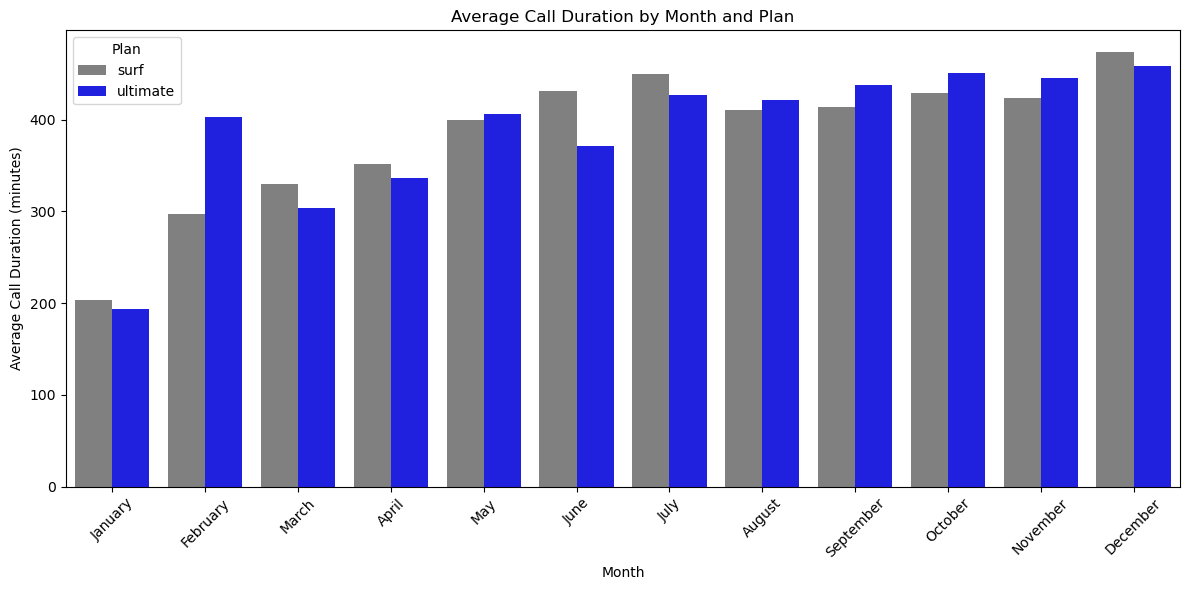

In [35]:
# Compare average call duration per plan and per month. Plot a bar graph to visualize it.

# Calculate average call duration
average_call_duration = merged_data.groupby(['plan', 'month'])['minutes_sum'].mean().reset_index()
print(average_call_duration.head(24))
print()

# Reorder months before plotting to ensure they appear in chronological order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with specified order
average_call_duration['month'] = pd.Categorical(average_call_duration['month'], categories=ordered_months, ordered=True)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_call_duration, x='month', y='minutes_sum', hue='plan', palette=['gray', 'blue'])
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration by Month and Plan')
plt.legend(title='Plan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

        plan      month  minutes_sum
0       surf      April      17577.0
1       surf     August      66438.0
2       surf   December     150680.0
3       surf   February       2673.0
4       surf    January        406.0
5       surf       July      54448.0
6       surf       June      41836.0
7       surf      March       7590.0
8       surf        May      30768.0
9       surf   November     119801.0
10      surf    October     101846.0
11      surf  September      80360.0
12  ultimate      April       7074.0
13  ultimate     August      29922.0
14  ultimate   December      69324.0
15  ultimate   February       2822.0
16  ultimate    January        774.0
17  ultimate       July      25197.0
18  ultimate       June      17435.0
19  ultimate      March       3651.0
20  ultimate        May      11781.0
21  ultimate   November      56540.0
22  ultimate    October      47778.0
23  ultimate  September      37626.0



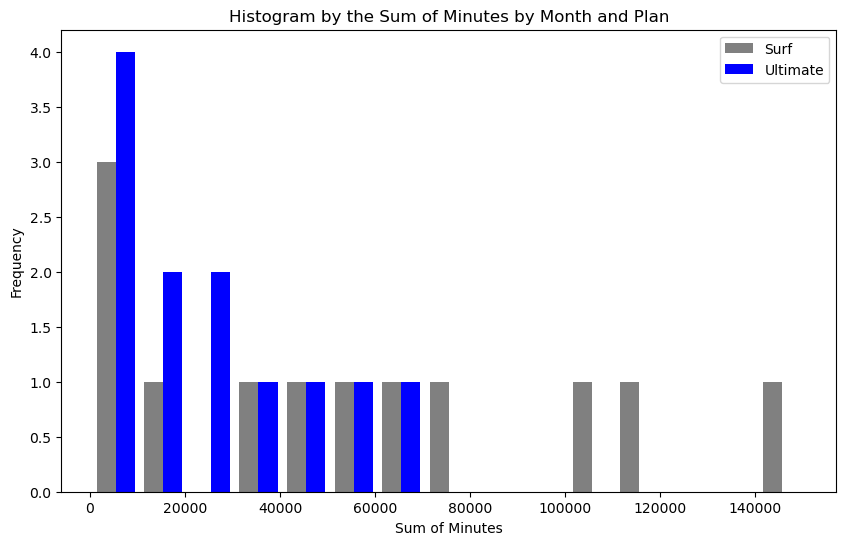

In [36]:
# Compare the monthly total minutes needed by users of each plan.

# Calculate total minutes per month for each plan
total_minutes_per_month = merged_data.groupby(['plan', 'month'])['minutes_sum'].sum().reset_index()
print(total_minutes_per_month.head(24))
print()

# Separate data for Surf and Ultimate plans
surf_minutes = total_minutes_per_month[total_minutes_per_month['plan'] == 'surf']['minutes_sum']
ultimate_minutes = total_minutes_per_month[total_minutes_per_month['plan'] == 'ultimate']['minutes_sum']

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist([surf_minutes, ultimate_minutes], bins=15, color=['gray', 'blue'], label=['Surf', 'Ultimate'])
plt.xlabel('Sum of Minutes')
plt.ylabel('Frequency')
plt.title('Histogram by the Sum of Minutes by Month and Plan')
plt.legend()
plt.grid(False)

plt.show()


Next, we calculate the mean and variance of the call duration to determine if users across different plans behave differently when making their calls.

In [37]:
# Calculate the mean and variance of monthly call durations.

# For Surf Plan
average_call_duration_surf = merged_data[merged_data['plan'] == 'surf']['minutes_sum'].mean()
variance_call_duration_surf = merged_data[merged_data['plan'] == 'surf']['minutes_sum'].var()

# For Ultimate Plan
average_call_duration_ultimate = merged_data[merged_data['plan'] == 'ultimate']['minutes_sum'].mean()
variance_call_duration_ultimate = merged_data[merged_data['plan'] == 'ultimate']['minutes_sum'].var()

print("For the Surf plan:")
print("Mean of monthly call duration:", average_call_duration_surf)
print("Variance of monthly call duration:", variance_call_duration_surf)
print("\nFor the Ultimate plan:")
print("Mean of monthly call duration:", average_call_duration_ultimate)
print("Variance of monthly call duration:", variance_call_duration_ultimate)

For the Surf plan:
Mean of monthly call duration: 428.7495232040687
Variance of monthly call duration: 54968.27946065032

For the Ultimate plan:
Mean of monthly call duration: 430.45
Variance of monthly call duration: 57844.4648122392


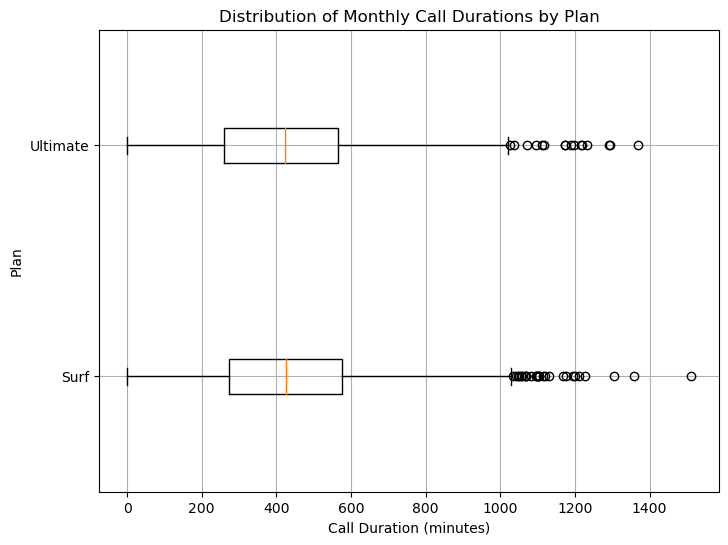

In [38]:
# Filter the data for each plan
surf_call_duration = merged_data[merged_data['plan'] == 'surf']['minutes_sum']
ultimate_call_duration = merged_data[merged_data['plan'] == 'ultimate']['minutes_sum']

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([surf_call_duration, ultimate_call_duration], labels=['Surf', 'Ultimate'], vert=False)
plt.title('Distribution of Monthly Call Durations by Plan')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Plan')
plt.grid(True)
plt.show()

<b>Observations on User Behavior Based on CALLS</b>

Based on the provided data, we can draw the following conclusions about user behavior regarding calls and how it varies by plan:

<b>1. Average Call Duration per Month:</b>

* Both plans, Surf and Ultimate, show slight variations in average call duration over the months. For example, in the Surf plan, the average call duration ranges from approximately 200 to 475 minutes, while in the Ultimate plan, it varies between around 190 and 460 minutes.

* Generally, there seems to be a similar trend in average call duration between the two plans over the months, with some months showing higher average durations than others in both cases.

<b>2. Monthly Minutes Needed:</b>

* Surf plan users tend to require more monthly minutes compared to Ultimate plan users. This is evidenced by the total number of minutes summed per month for each plan, where Surf users accumulate a significantly higher amount of minutes overall compared to Ultimate users.

<b>3. Mean and Variance of Monthly Call Duration:</b>

* The mean monthly call duration is similar between the two plans, with values close to 430 minutes for both. This suggests that, on average, users of both plans have comparable monthly call durations.

* However, the variance of monthly call duration is slightly higher in the Ultimate plan compared to the Surf plan (although it is barely noticeable in the box plot). This indicates that, while average durations are similar, the dispersion of data around the mean is slightly greater in the Ultimate plan, suggesting greater variability in user behavior in this plan.

* Nevertheless, let's not be confused; differences in terms of median positions, interquartile range, and whisker values are barely noticeable between both plans.

* What I can clearly see is that the Surf plan has more outliers than the Ultimate plan, which is understandable considering that many users significantly exceeded the minute limit.

### Messages

In [39]:
# Filter the data for each plan and calculate the number of messages per month
surf_sms_per_month = merged_data[merged_data['plan'] == 'surf'].groupby('month')['sms_count'].sum()
ultimate_sms_per_month = merged_data[merged_data['plan'] == 'ultimate'].groupby('month')['sms_count'].sum()

print("Surf Plan Monthly Messages:")
print(surf_sms_per_month)
print("\nUltimate Plan Monthly Messages:")
print(ultimate_sms_per_month)

Surf Plan Monthly Messages:
month
April          870.0
August        4662.0
December     12275.0
February       108.0
January         21.0
July          3271.0
June          2454.0
March          351.0
May           1849.0
November      9165.0
October       8020.0
September     5968.0
Name: sms_count, dtype: float64

Ultimate Plan Monthly Messages:
month
April         463.0
August       2732.0
December     6796.0
February      151.0
January        62.0
July         1937.0
June         1379.0
March         243.0
May           931.0
November     4903.0
October      4181.0
September    3259.0
Name: sms_count, dtype: float64


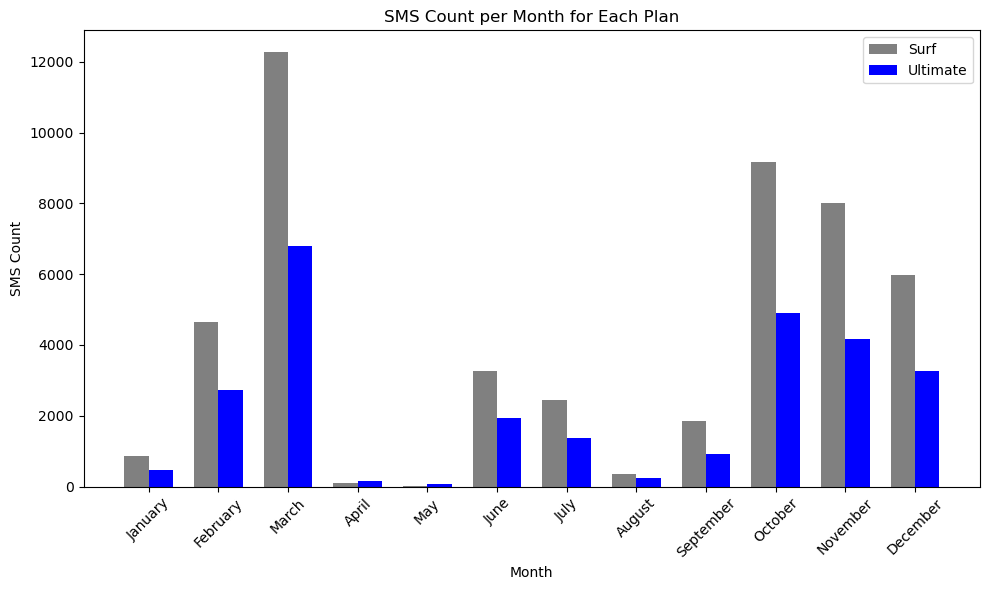

In [40]:
# Let's filter
surf_sms_per_month = merged_data[merged_data['plan'] == 'surf'].groupby('month')['sms_count'].sum()
ultimate_sms_per_month = merged_data[merged_data['plan'] == 'ultimate'].groupby('month')['sms_count'].sum()

# Let's reorder the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the graph
bar_width = 0.35
index = np.arange(len(months_order))
plt.figure(figsize=(10, 6))
plt.bar(index, surf_sms_per_month, bar_width, label='Surf', color='gray')
plt.bar(index + bar_width, ultimate_sms_per_month, bar_width, label='Ultimate', color='blue')
plt.xlabel('Month')
plt.ylabel('SMS Count')
plt.title('SMS Count per Month for Each Plan')
plt.xticks(index + bar_width / 2, months_order, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

<b>Observations on User Behavior Based on MESSAGES</b>

Here are observations on user behavior based on plan regarding text messaging:

<b>1. Total Volume of Messages:</b>

* In the Surf plan, we observe that the total volume of messages varies significantly from month to month, with peaks in October, November, and December, where the highest numbers of messages are recorded. However, the most notable volume of messages is in March.

* In the Ultimate plan, we also see variations in the total volume of messages, with highlighted points in October, November, and December, and similarly, a notable peak in March. However, the total numbers are lower compared to the Surf plan.

<b>2. Differences Between Plans:</b>

* Overall, the Surf plan tends to have a higher total volume of messages in most months compared to the Ultimate plan. This is especially evident in months like December, November, and October, where the difference in total message volume between the two plans is notable.

* However, the Ultimate plan shows greater stability in the total volume of messages throughout the year, with more consistent numbers compared to the Surf plan, which shows more pronounced fluctuations.

Both plans show an increase in message volume towards the end of the year. This may indicate increased use of messaging services during holidays or periods of higher social activity.

Additionally, there is a general trend of sending fewer messages in the months of January, April, May, and August, which could be related to vacations or the start of the new year.

In summary, while both plans exhibit similar patterns in messaging behavior throughout the year, there are significant differences in the total volume of messages between the Surf plan and the Ultimate plan. These differences could be attributed to the different plan features and limits, as well as individual user preferences and needs.

### Internet

        plan      month     mb_used
0       surf      April   599210.15
1       surf     August  2720843.68
2       surf   December  5766125.26
3       surf   February   109609.59
4       surf    January     9749.72
5       surf       July  2030815.67
6       surf       June  1484248.33
7       surf      March   306945.12
8       surf        May  1073099.33
9       surf   November  4624009.00
10      surf    October  4102786.41
11      surf  September  3218737.67
12  ultimate      April   338554.75
13  ultimate     August  1264845.13
14  ultimate   December  2766801.97
15  ultimate   February   119901.66
16  ultimate    January    27672.37
17  ultimate       July   964339.92
18  ultimate       June   720882.29
19  ultimate      March   219858.22
20  ultimate        May   482109.99
21  ultimate   November  2163278.04
22  ultimate    October  1866930.66
23  ultimate  September  1459408.78



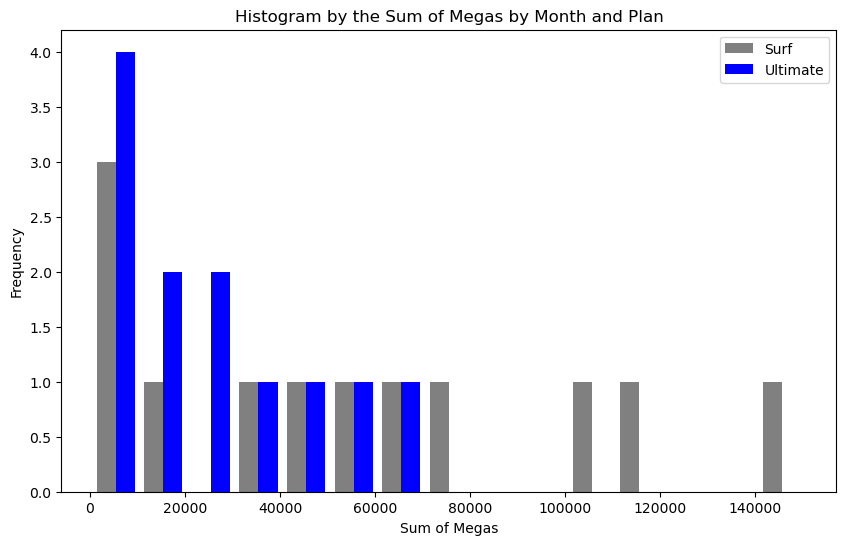

In [41]:
# We calculate monthly MB por each plan and month

mb_per_plan_month = merged_data.groupby(['plan', 'month'])['mb_used'].sum().reset_index()
print(mb_per_plan_month.head(24))
print()

surf_mb = mb_per_plan_month[mb_per_plan_month['plan'] == 'surf']['mb_used']
ultimate_mb = mb_per_plan_month[mb_per_plan_month['plan'] == 'ultimate']['mb_used']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.hist([surf_minutes, ultimate_minutes], bins=15, color=['gray', 'blue'], label=['Surf', 'Ultimate'])
plt.xlabel('Sum of Megas')
plt.ylabel('Frequency')
plt.title('Histogram by the Sum of Megas by Month and Plan')
plt.legend()
plt.grid(False)

plt.show()

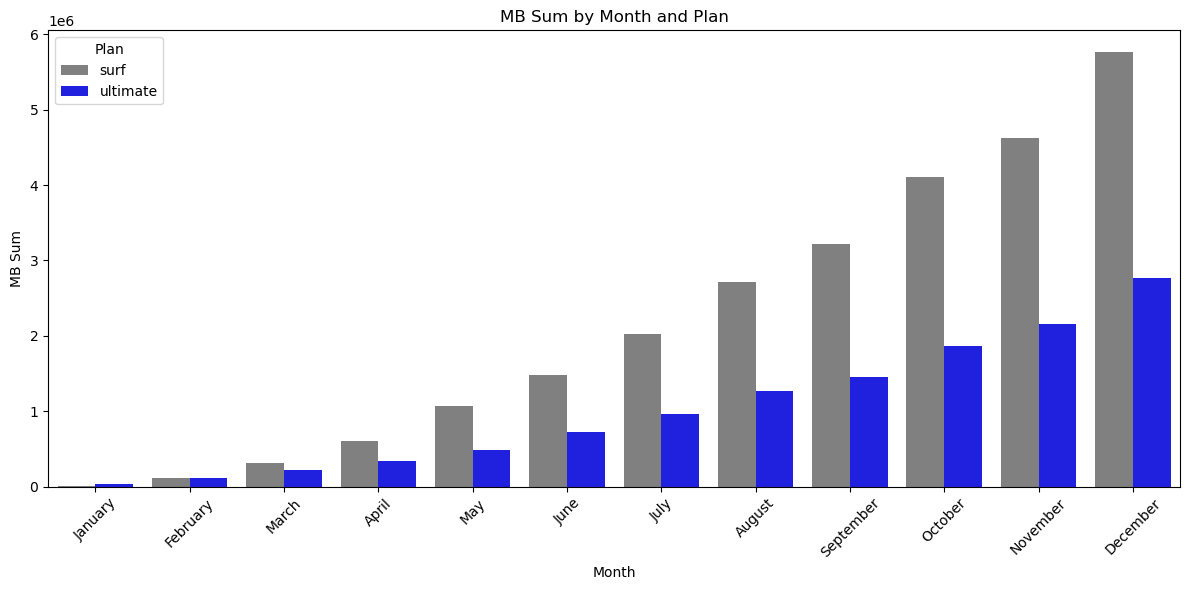

In [42]:
# Before proceeding with the bar chart, we first reorder the months
# This is because otherwise, the bar chart will display them out of order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'month' column to a categorical type with the specified order
mb_per_plan_month['month'] = pd.Categorical(mb_per_plan_month['month'], categories=ordered_months, ordered=True)

# Plotting the bars
plt.figure(figsize=(12, 6))
sns.barplot(data=mb_per_plan_month, x='month', y='mb_used', hue='plan', palette=['gray', 'blue'])
plt.xlabel('Month')
plt.ylabel('MB Sum')
plt.title('MB Sum by Month and Plan')
plt.legend(title='Plan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<b>Observations on User Behavior Based on MEGABYTES</b>

Here are observations on user behavior based on plan regarding data usage:

<b>1. Monthly MB Usage:</b>

* Both Surf and Ultimate plans exhibit a similar pattern in MB usage across months. Generally, there is a progressive increase as the year progresses from summer to winter, which could be related to seasonal activity and user behavior.

<b>2. Differences in MB Usage Between Plans:</b>

* Although the general patterns of usage show a similar growth trend, there are significant differences in the amount of MB used monthly between the Surf and Ultimate plans. This could be due to differences in data policies or user perception of value between users of each plan.

<b>3. Consistency Within Each Plan:</b>

* Within each plan, MB usage tends to be more consistent across months, with predictable seasonal fluctuations. This suggests that users of each plan may have similar data consumption needs, regardless of the differences in total amounts between plans.

In summary, while users of both plans exhibit similar seasonal patterns in MB usage, there are significant differences in the total amount of MB used monthly between the Surf and Ultimate plans. These differences may influence user satisfaction and the perceived value of the service offered by each plan.

### Income

Just as you have studied the behavior of users, describe statistically the revenues from the plans.

        plan      month    revenue
0       surf      April  40.710600
1       surf     August  63.931173
2       surf   December  70.557044
3       surf   February  34.396667
4       surf    January  20.000000
5       surf       July  62.674050
6       surf       June  49.276289
7       surf      March  45.941304
8       surf        May  47.628182
9       surf   November  58.004276
10      surf    October  65.421224
11      surf  September  58.271495
12  ultimate      April  73.000000
13  ultimate     August  72.859155
14  ultimate   December  73.291391
15  ultimate   February  70.000000
16  ultimate    January  70.000000
17  ultimate       July  71.898305
18  ultimate       June  71.638298
19  ultimate      March  74.666667
20  ultimate        May  70.724138
21  ultimate   November  71.708661
22  ultimate    October  72.311321
23  ultimate  September  72.034884
__________________________________________________


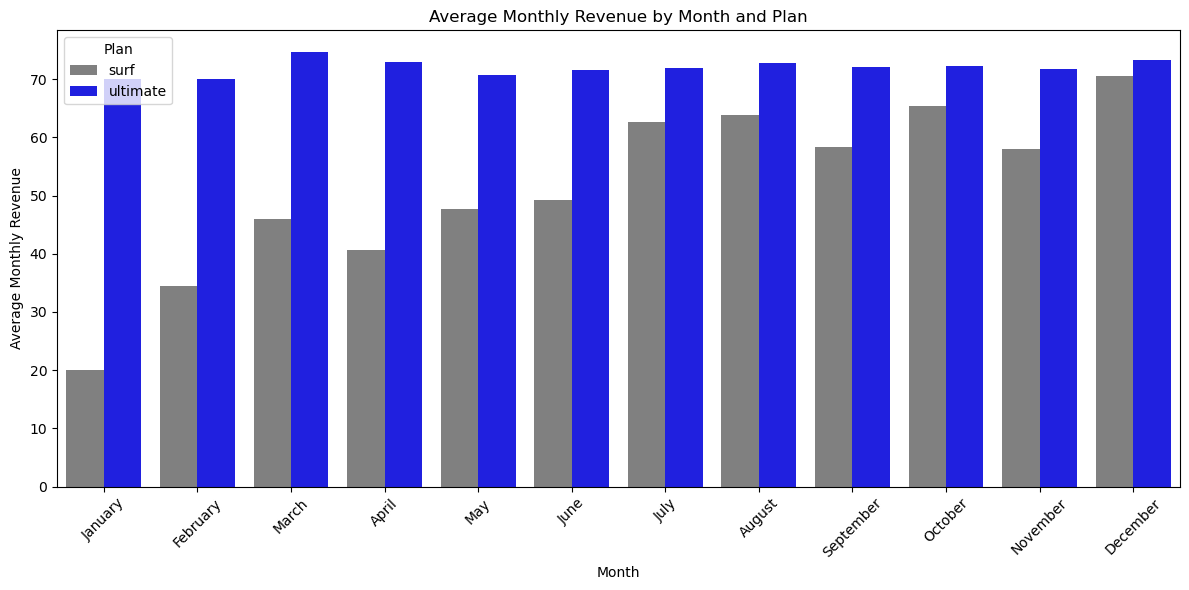

In [43]:
# 1.- Compare average revenue for each plan and each month
average_monthly_revenue = merged_data.groupby(['plan', 'month'])['revenue'].mean().reset_index()
print(average_monthly_revenue.head(24))
print('_'*50)

# 2.- Bar plot
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_monthly_revenue['month'] = pd.Categorical(average_monthly_revenue['month'], categories=months_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_monthly_revenue, x='month', y='revenue', hue='plan', palette=['gray', 'blue'])
plt.xlabel('Month')
plt.ylabel('Average Monthly Revenue')
plt.title('Average Monthly Revenue by Month and Plan')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Observations on Revenue Behavior</b>

After analyzing the average revenues for each plan and each month, the following conclusions and perspectives can be drawn:

* <b>Surf Plan:</b> Monthly average revenues vary throughout the year, with some months showing higher revenues than others. For example, July, August, and December have the highest average revenues for the Surf plan. This could be attributed to increased service usage during the summer months and year-end holidays, resulting in higher generated revenues.

* <b>Ultimate Plan:</b> In contrast to the Surf plan, monthly average revenues for the Ultimate plan remain relatively stable throughout the year, with minor variations. This suggests that users of this plan tend to maintain a consistent level of service usage, regardless of the month.

In summary, while both plans generate monthly revenues, the revenue behavior varies between the two plans. The Surf plan exhibits more pronounced fluctuations in monthly revenues, likely due to seasonal variations in service usage, whereas the Ultimate plan tends to maintain more stable revenues throughout the year. This insight could be valuable for the service provider when planning pricing and marketing strategies for each plan.

## Statistical Hypotheses

<b>Hypothesis Testing for the NY-NJ-PA Area</b>

Next, we will test the hypothesis regarding the differences in average revenue from users of the Ultimate and Surf calling plans.

To do this, we will formulate the null and alternative hypotheses, choose the statistical test, and determine the significance level.

Let's start by establishing our null and alternative hypotheses:

* <b>Null Hypothesis (H0):</b> The average revenues from users of the Ultimate and Surf calling plans are equal.
* <b>Alternative Hypothesis (H1):</b> The average revenues from users of the Ultimate and Surf calling plans are different.

In [44]:
from scipy.stats import ttest_ind

# Filter the data to get revenues of users for each plan
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['revenue']
surf_revenue = merged_data[merged_data['plan'] == 'surf']['revenue']

# Perform t-test to compare the average revenues of the two groups
t_statistic, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Regular significance level, not too strict
alpha = 0.05

print("T-statistic:", t_statistic)
print("P-Value:", p_value)

# Check whether to reject the null hypothesis using a function:
if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference between the average revenues of Surf and Ultimate plans.")
else:
    print("Null hypothesis not rejected. There is not enough evidence to claim a significant difference between the average revenues of Surf and Ultimate plans.")

T-statistic: 7.952094891333888
P-Value: 3.1703905481135734e-15
Null hypothesis rejected. There is a significant difference between the average revenues of Surf and Ultimate plans.


<b>Hypothesis Testing for the NY-NJ-PA Area</b>

Next, we will test the hypothesis that the average revenue from users in the NY-NJ-PA area is different from users in other regions.

Let's start by establishing our null and alternative hypotheses:

* <b>Null Hypothesis (H0):</b> The average revenue from users in the NY-NJ-PA area is equal to the average revenue from users in other regions.

* <b>Alternative Hypothesis (H1):</b> The average revenue from users in the NY-NJ-PA area is different from the average revenue from users in other regions.

<b>NOTE THAT WE ARE USING THE TRI-STATE AREA NY-NJ-PA, AS IT APPEARS IN THE DATAFRAME</b>

In [45]:
# For this hypothesis, we need to integrate the column of U.S. states into the master dataframe:
merged_data = merged_data.merge(mlusers_df[['user_id', 'state']], on='user_id', how='left')
print(merged_data.sample(5))

      user_id      plan  monthly_pay      month  minutes_sum  calls_count  \
57       1014      surf           20   November        163.0         28.0   
1584     1343      surf           20   November        424.0         63.0   
1336     1285      surf           20  September        425.0         65.0   
117      1031  ultimate           70    October        563.0         74.0   
1649     1358      surf           20   December         18.0          4.0   

      sms_count   mb_used    gb_used  gb_rounded  min_exc  sms_exc  gb_exc  \
57          9.0   1175.59   1.148037           2        0        0       0   
1584      134.0  16400.25  16.015869          17        0       84       2   
1336       24.0   3673.10   3.587012           4        0        0       0   
117         2.0  18775.73  18.335674          19        0        0       0   
1649        0.0   3106.00   3.033203           4        0        0       0   

      min_exc_fee  sms_exc_fee  gb_exc_fee  revenue     state  
57  

In [46]:
from scipy.stats import ttest_ind

# Filter the data to get revenues of users from the NY-NJ-PA area
ny_nj_pa_revenue = merged_data[merged_data['state'].isin(['NY-NJ-PA'])]['revenue']

# Filter the data to get revenues of users from other regions
other_states_revenue = merged_data[~merged_data['state'].isin(['NY-NJ-PA'])]['revenue']

# Perform Student's t-test to compare the average revenues of the two groups
t_statistic, p_value = ttest_ind(ny_nj_pa_revenue, other_states_revenue, equal_var=False)

alpha = 0.05

print("T-statistic:", t_statistic)
print("P-Value:", p_value)

# Check if we reject the null hypothesis
if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference between the average revenues of users from the NY-NJ-PA area and other regions.")
else:
    print("Null hypothesis not rejected. There is not enough evidence to claim a significant difference between the average revenues of users from the NY-NJ-PA area and other regions.")

T-statistic: -2.1309454999502133
P-Value: 0.0335256158853001
Null hypothesis rejected. There is a significant difference between the average revenues of users from the NY-NJ-PA area and other regions.


## Conclusions

Below, I enumerate my important conclusions. These conclusions encompass all the significant decisions (assumptions) we adopted that determined the chosen method for processing and analyzing the data.

After a thorough analysis of the provided data, we can conclude the following:

<b>1. Comparison of Surf and Ultimate Plans:</b>

* Upon examining the data, we observe no clear trend that Ultimate plan users use more calling minutes on average than Surf plan users in most months, except in certain seasons. Calling minutes vary between the two plans depending on the month (sometimes Surf is higher, other times Ultimate), showing no specific direction in terms of which plan uses more minutes on average.

* Reviewing the data again, I confirm that in March and the months of October, November, and December, the Surf plan has a higher volume of text messages compared to the Ultimate plan. Therefore, the assertion that Surf plan users send more text messages on average holds true for these particular months.

* Upon reviewing the data, it is confirmed that Surf plan users use more data on average than Ultimate plan users. The data clearly shows that overall, the Surf plan has a higher volume of data used in most months, as indicated in the provided values.

<b>2. Generated Revenue:</b>

* The analysis of average revenues by each plan and month reveals that overall, the Ultimate plan generates more average revenue than the Surf plan. This is confirmed by the bar graph and hypothesis test, which show a significant difference in average revenue between the two plans.

<b>3. Strategic Decisions:</b>

* Based on these findings, it would be recommended for the sales department to adjust its advertising budget to prioritize the promotion of the Ultimate plan, as it is likely to generate higher revenues.

* Additionally, considering specific marketing strategies to encourage Surf plan users to switch plans would be beneficial, as it would ultimately be less expensive on average for them. A clear win-win for both users and the company.

<b>4. Additional Considerations:</b>

* We also observed significant differences in average revenue between users in the NY-NJ-PA area and those in other regions, suggesting the possibility of implementing more focused marketing strategies in these areas to increase revenue.

* It is important to note that differences in user behavior between the two plans may influence the effectiveness of marketing strategies and advertising resource allocation.

In summary, the detailed data analysis has provided valuable insights into user behavior and revenue generated by the Surf and Ultimate plans. These conclusions can serve as a guide for making strategic decisions that drive business growth and profitability.

<b>In a Nutshell: For 2019, Megaline should focus on encouraging Surf users to switch to Ultimate.</b>
